i want to separate this notebook only for data exploration and understanding

In [2]:
# libraries
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid',
              palette='muted',
              context='notebook')

import numpy as np
from scipy.stats import ttest_ind

In [3]:
# data
train = pd.read_csv('./data/train.csv', sep=',')
test = pd.read_csv('./data/test.csv', sep=',')
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [4]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: ylabel='SalePrice'>

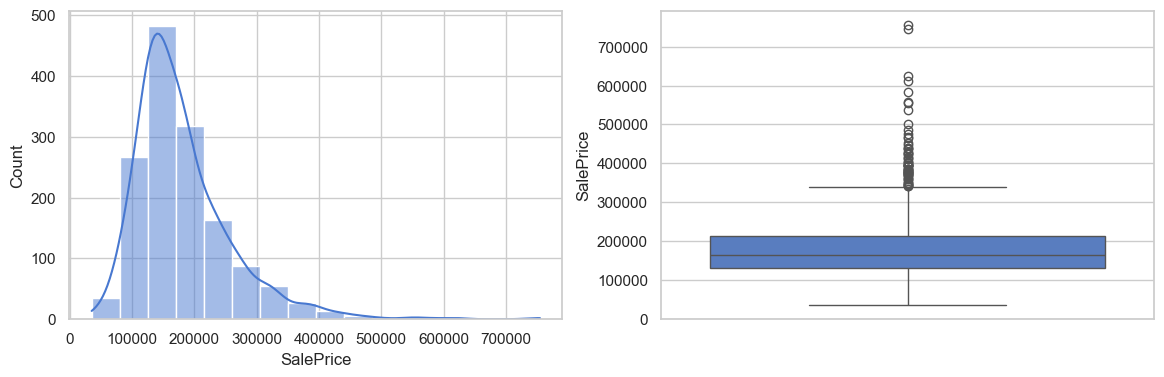

In [7]:
# distribution of the target variable
fig, axs = plt.subplots(1, 2, figsize=[14, 4])
sns.histplot(train['SalePrice'], kde=True, bins=16, ax=axs[0])
sns.boxplot(train['SalePrice'], ax=axs[1])

In [8]:
# target class has skewed distribution and what seems to be a good amount of outliers

In [9]:
# MSSubClass is as an int, but are just codes for the type of dwelling involved in the sale
train['MSSubClass'] = train['MSSubClass'].astype(str)

# and Id will not help in the exploration of the data
train.drop('Id', axis=1, inplace=True)

In [10]:
# separating the numerical variables of the categorical ones, to ease the plotting of data
num_cols = train.select_dtypes(include='number').columns
cat_cols = train.select_dtypes(include='object').columns
train[num_cols]

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0          196.0         706           0        150          856       856   
1            0.0         978           0        284         1262      1262   
2          162.0         486           0        434          920       920   
3            0.0         216           0        540          756       961   
4          350.0         655           0        490         1145      1145   
...          ...         ...         ...        ...          ...       ...   
1455         0.0           0           0        953          953       953   
1456       119.0         790         163        589         1542      2073   
1457         0.0         275           0        877         1152      1188   
1458         0.0          49        1029          0         1078      1078   
1459         0.0         830         290        136         1256      1256   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0          854             0       1710             1             0         2   
1            0             0       1262             0             1         2   
2          866             0       1786             1             0         2   
3          756             0       1717             1             0         1   
4         1053             0       2198             1             0         2   
...        ...           ...        ...           ...           ...       ...   
1455       694             0       1647             0             0         2   
1456         0             0       2073             1             0         2   
1457      1152             0       2340             0             0         2   
1458         0             0       1078             1             0         1   
1459         0             0       1256             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0            1             3             1             8           0   
1            0             3             1             6           1   
2            1             3             1             6           1   
3            0             3             1             7           1   
4            1             4             1             9           1   
...        ...           ...           ...           ...         ...   
1455         1             3             1             7           1   
1456         0             3             1             7           2   
1457         0             4             1             9           2   
1458         0             2             1             5           0   
1459         1             3             1             6           0   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0          2003.0           2         548           0           61   
1          1976.0           2         460         298            0   
2          2001.0           2         608       

In [11]:
train[cat_cols]

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
0            60       RL   Pave   NaN      Reg         Lvl    AllPub   
1            20       RL   Pave   NaN      Reg         Lvl    AllPub   
2            60       RL   Pave   NaN      IR1         Lvl    AllPub   
3            70       RL   Pave   NaN      IR1         Lvl    AllPub   
4            60       RL   Pave   NaN      IR1         Lvl    AllPub   
...         ...      ...    ...   ...      ...         ...       ...   
1455         60       RL   Pave   NaN      Reg         Lvl    AllPub   
1456         20       RL   Pave   NaN      Reg         Lvl    AllPub   
1457         70       RL   Pave   NaN      Reg         Lvl    AllPub   
1458         20       RL   Pave   NaN      Reg         Lvl    AllPub   
1459         20       RL   Pave   NaN      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3       Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          FR2       Gtl      NoRidge       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
1455    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
1456    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
1457    Inside       Gtl      Crawfor       Norm       Norm     1Fam   
1458    Inside       Gtl        NAmes       Norm       Norm     1Fam   
1459    Inside       Gtl      Edwards       Norm       Norm     1Fam   

     HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0        2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1        1Story     Gable  CompShg     MetalSd     MetalSd        NaN   
2        2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3        2Story     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4        2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...         ...       ...      ...         ...         ...        ...   
1455     2Story     Gable  CompShg     VinylSd     VinylSd        NaN   
1456     1Story     Gable  CompShg     Plywood     Plywood      Stone   
1457     2Story     Gable  CompShg     CemntBd     CmentBd        NaN   
1458     1Story       Hip  CompShg     MetalSd     MetalSd        NaN   
1459     1Story     Gable  CompShg     HdBoard     HdBoard        NaN   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           Gd        TA      PConc       Gd       TA           No   
1           TA        TA     CBlock       Gd       TA           Gd   
2           Gd        TA      PConc       Gd       TA           Mn   
3           TA        TA     BrkTil       TA       Gd           No   
4           Gd        TA      PConc       Gd       TA           Av   
...        ...       ...        ...      ...      ...          ...   
1455        TA        TA      PConc       Gd       TA           No   
1456        TA        TA     CBlock       Gd       TA           No   
1457        Ex        Gd      Stone       TA       Gd           No   
1458        TA        TA     CBlock       TA       TA           Mn   
1459        Gd        TA     CBlock       TA       TA           No   

     BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0             GLQ          Unf    GasA        Ex          Y      SBrkr   
1             ALQ          Unf    GasA        Ex          Y      SBrkr   
2             GLQ          Unf    GasA        Ex          Y      SBrkr   
3             ALQ          Unf    GasA        Gd          Y      SBrkr   
4             GLQ          Unf    GasA        Ex          Y      SBrkr   
...           ...          ...     ...       ...        ...        ...   
1455          Unf          Unf    GasA 

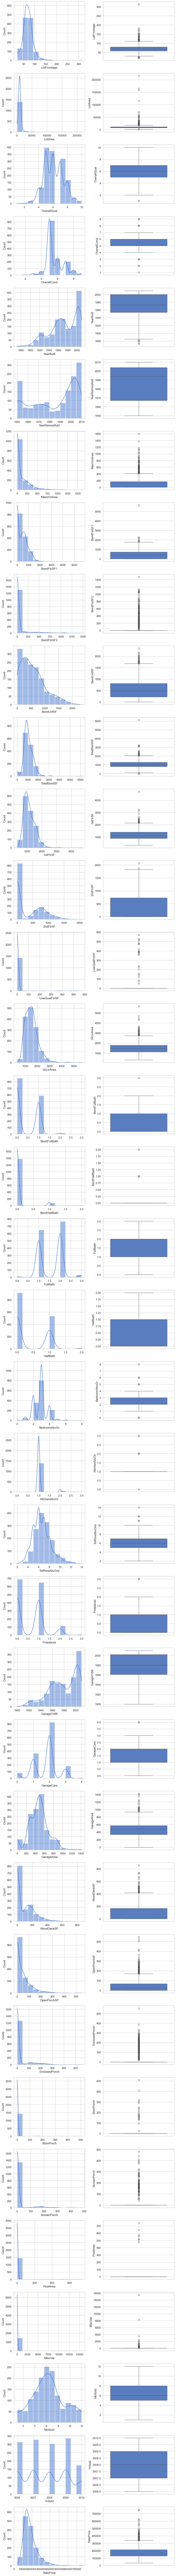

In [12]:
# function to plot the distribution of the columns

def multiple_plots(columnstoplot, data):
    size = len(columnstoplot)
    fig, axs = plt.subplots(size, 2, figsize=(10, size * 4))

    for i, column in enumerate(columnstoplot):
        
        sns.histplot(data[column], kde=True, bins=12, ax=axs[i, 0])
        axs[i, 0].set_xlabel(column)

        sns.boxplot(data=data, y=column, ax=axs[i, 1])
        axs[i, 1].set_ylabel(column)

    plt.tight_layout()
    plt.show()

multiple_plots(num_cols, train)

In [13]:
train['OverallCond'].value_counts().sort_values(ascending=True)

OverallCond
1      1
2      5
9     22
3     25
4     57
8     72
7    205
6    252
5    821
Name: count, dtype: int64

In [14]:
'''
MSSubClass - is a categorical variable translated to numerical codes
LotFrontage - skewed right, a lot of outliers, it seems like most part is concentrated around the median, could check if the outliers values are valid data
LotArea - very skewed right, very small interquatile range, a lot of outliers, check if data is well inputed
OverallQual - quality of the material and finish rated 1 through 10
OverallCond - same as above but for condition
YearBuilt - pretty self explanatory, could check if the oldest values are miss inputed or not
YearRemodAdd - year of remodel, it will be the same value as yearbuilt if didnt got a remodel, could check the oldest values
MasVnrArea - masonry veneer area in square feet, very skewed as it should be, nothing crazy I guess
BsmtFinSF1 - basement type 1 area, very skewed
BsmtFinSF2 - basement type 2 area, very skewed, most instances are 0 valued
BsmtUnfSF - unfinished basement area, very skewed
TotalBsmtSF - total basement area, maybe verify some outliers
1stFlrSF - first floor area
2ndFlrSF - second floor area
LowQualFinSF - low quality finished area (all floors), mostly 0s
GrLivArea - above ground living area, skewed right
BsmtFullBath - number of full bathrooms in the basement
BsmtHalfBath - number of half bathrooms in the basement
FullBath - number of full bathrooms above ground
HalfBath - number of half bathrooms above ground
BedroomAbvGr - number of bedrooms above ground
KitchenAbvGr - number of kitchen above ground
TotRmsAbvGr - total rooms above ground, non including bathrooms
Fireplaces - number of fireplaces
GarageYrBlt - year garage was built, normal to have more values close to current day
GarageCars - size of garage in car capacity
GarageArea - kinda skewed right
MiscVal - value of miscellaneous feature
MoSold - most normally distributed variable, could investigate why have more sales mid year
YrSold - only got values from 2006 to 2010, US was in the midst of a housing bubble in 2006, wich have hit its peak in early 2007, in 2008 the world suffer from the global financial crisis
SalePrice - what we want to predict, skewed right
'''
print('helo word')

helo word


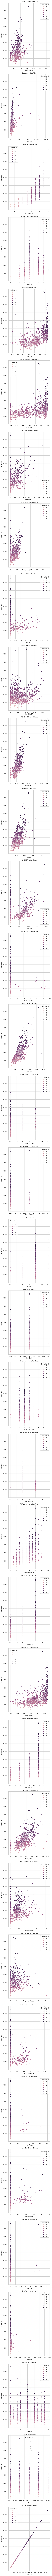

In [15]:
fig, axs = plt.subplots(nrows=len(num_cols), figsize=(6, (len(num_cols) * 8)))
for i, column in enumerate(num_cols):
    sns.scatterplot(data=train, y='SalePrice', x=column, hue='OverallQual', legend=True, ax=axs[i])
    axs[i].set_title(f'{column} vs SalePrice')

plt.tight_layout()
plt.show()

- newer houses seems to have a higher saleprice on average  
- same as above for recently remodelled houses  
- the most expensives houses all seems to have a great grade at overallqual  
- while overallcond doesnt seems to have, can investigate further  
- yearbuilt and yearremodadd, both seems to have a positive correlation  
- investigate better the relation between bsmtfintype1 and bsmtfinsf1, and for type 2 aswell  
- square feet variables seems to positively impact houseprice  
- better investigate grlivarea  
- full bathrooms and bedroom numbers have a positive correlation with the price  
- aswell as total rooms above ground  
- more than 1 kitchen doesnt seems to impact the price  
- size of garage by number of cars have a good impact till size 3, the size 4 garages wasnt selled by that great of a price, maybe its a small sample size problem  
- month and year of sale doenst seem to impact, maybe investigate the mean/median by year/month and the value_count of each  

In [17]:
# creating a variable in datetime format for date of sale
train['SaleDate'] = pd.to_datetime(train['YrSold'].astype(str) + '-' + train['MoSold'].astype(str))
train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            60       RL         65.0     8450   Pave   NaN      Reg   
1            20       RL         80.0     9600   Pave   NaN      Reg   
2            60       RL         68.0    11250   Pave   NaN      IR1   
3            70       RL         60.0     9550   Pave   NaN      IR1   
4            60       RL         84.0    14260   Pave   NaN      IR1   
...         ...      ...          ...      ...    ...   ...      ...   
1455         60       RL         62.0     7917   Pave   NaN      Reg   
1456         20       RL         85.0    13175   Pave   NaN      Reg   
1457         70       RL         66.0     9042   Pave   NaN      Reg   
1458         20       RL         68.0     9717   Pave   NaN      Reg   
1459         20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   
...        

<Axes: xlabel='SaleDate', ylabel='SalePrice'>

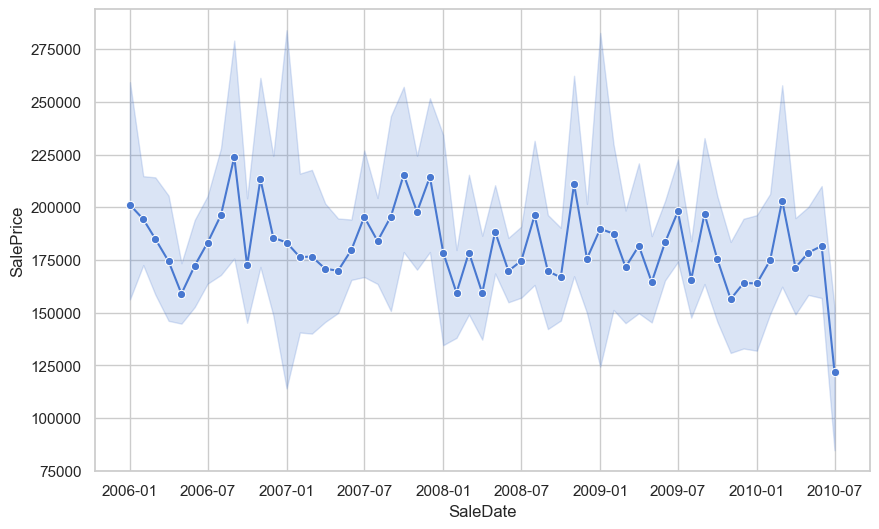

In [18]:
# visualizing the variation of SalePrice over the time
plt.figure(figsize=(10, 6))
sns.lineplot(x='SaleDate', y='SalePrice', data=train, marker='o', color='b')

- doenst seem to have a big variation over the years, the unfolding financial crisis in this period in time and place maybe didnt affect as much as I would think

In [20]:
## to have a better look at the outliers from each column
def inspect_outliers(dataframe, column):
    q1= dataframe[column].quantile(0.25)
    q3= dataframe[column].quantile(0.75)
    iqr= q3-q1
    lower_bound = q1-(1.5*iqr)
    upper_bound = q3+(1.5*iqr)
    
    return dataframe[
          (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
    ]

def inspect_nulls(dataframe, column):
    return dataframe[dataframe[column].isna()]

train[train['Electrical'].isna()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379         80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379        384          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0         NaN    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin           2         400         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0    NaN   NaN         NaN        0       5    2008       WD   

     SaleCondition  SalePrice   SaleDate  
1379        Normal     167500 2008-05-01

In [35]:
train[num_cols].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

**which variables are probably related**  
MSZoning - Neighborhood - (MAYBE) Utilities - Condition variables  
Condition1 - Condition2  
LandContour - Land Slope - (MAYBE) LotShape (?)  
BldgType - HouseStyle  
OverallQual - OverallCond  
YearBuilt - YearRemodAdd - GarageYrBlt
YrSold - MoSold (maybe transform this to datetime)
CentralAir - HeatingQC - Heating
ExterCond - ExterQual  
Exterior1st - Exterior2nd  
OpenPorchSF - EnclosedPorch - 3SsnPorch - ScreenPorch  
PoolArea - PoolQC  
MiscFeature - MiscVal  
SaleType - SaleCondition  
Fireplaces - FireplaceQu  
GarageArea - GarageCars  
GarageCond - GarageQual  
MiscVal - MiscFeature  
BsmtQual - BsmtCond  
BsmtFinType1 - BsmtFinType2  

**next steps:**  


- handle the null values,
- create features like houseAge when sold, totalArea, areaPerRoom, (MAYBE) condition + quality / 2 features, hasPool, etc...
- encoding
- maybe flags for has fireplace, garage, pool, porch, total bathrooms (full and half), bsmtbathrooms (full and half)
- flag for remodel